# Download of the Dataset

In [57]:
# Import libraries
import os
import numpy as np
import pandas as pd
import random
import tensorflow as tf

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [58]:
cwd = '/content'
zip_url = 'https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip'
zip_path = '/content/human+activity+recognition+using+smartphones.zip'
data_set_name = 'UCI HAR Dataset'
data_set_zip_path = os.path.join(cwd, f'{data_set_name}.zip')
data_set_path = os.path.join(cwd,data_set_name)
# Downloads data if neccesary
if not os.path.exists(data_set_path):
  try:
    if not os.path.exists(zip_path):
      # Download the .zip file
      !wget --no-check-certificate -O {zip_path} {zip_url}

    if not os.path.exists(os.path.join(cwd,f'{data_set_name}.zip')):
      # Unzip the file
      !unzip {zip_path} "{data_set_name}.zip" -d {cwd}

    # Unzip the second zip
    !unzip "{data_set_zip_path}" "{data_set_name}/*" -d "{cwd}"
  except Exception as e:
    print(f"An error occured {str(e)}")
  else:
    # Deletes remaining zip archives
    !rm {zip_path} "{data_set_zip_path}"

# Data Exploration

In [59]:
# Paths to the data
train_time_series_path = os.path.join(data_set_path, 'train', 'Inertial Signals')
test_time_series_path = os.path.join(data_set_path, 'test', 'Inertial Signals')

# Paths to the time series
train_labels_path = os.path.join(data_set_path, 'train', 'y_train.txt')
test_labels_path = os.path.join(data_set_path, 'test', 'y_test.txt')

time_series_test = pd.read_csv(os.path.join(train_time_series_path,'body_acc_x_train.txt'), sep='\s+', header=None)
time_series_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.388873,0.618763,0.774067,0.586568,0.217007,-0.027330,-0.171294,-0.218988,-0.137680,0.033094,...,-0.227949,-0.247119,-0.227710,-0.210942,-0.179295,-0.142085,-0.131831,-0.154000,-0.176886,-0.211068
7348,0.711864,0.709237,0.321368,-0.028921,-0.208107,-0.192802,-0.066754,-0.042285,0.058089,0.106855,...,-0.311864,-0.316281,-0.274100,-0.326159,-0.379539,-0.382544,-0.371156,-0.295357,-0.203831,-0.124548
7349,-0.226717,-0.177817,-0.150869,-0.132237,-0.068338,0.007874,0.096481,0.205834,0.441342,0.662930,...,-0.177051,-0.248426,-0.313892,-0.367070,-0.395135,-0.347338,-0.319902,-0.294935,-0.243403,-0.215215
7350,-0.064806,-0.079933,-0.068350,-0.038477,-0.028679,0.018335,0.077571,0.253580,0.507805,0.583999,...,-0.240819,-0.330930,-0.396854,-0.413906,-0.379085,-0.356609,-0.317618,-0.315016,-0.330737,-0.272348


In [60]:
# Number of samples, time steps, and features
train_n_samples, test_n_samples, n_time_steps, n_features, n_classes = 7352, 2947, 128, 9, 6

# Name of the features
feature_names = [
  'body_acc_x',
  'body_acc_y',
  'body_acc_z',
  'body_gyro_x',
  'body_gyro_y',
  'body_gyro_z',
  'total_acc_x',
  'total_acc_y',
  'total_acc_z'
]

## Processing Data

In [61]:
# Function that returns the required Dataframes
def format_data_cnn_lstm(n_samples: int, n_time_steps: int, n_features: int, n_classes: int,  feature_names: list[str], labels_path: str, time_series_path: str, set_type: str = 'train') -> tuple[np.ndarray, np.ndarray] :
  import numpy as np
  import pandas as pd
  import tensorflow.keras.utils as utils
  import os
  # Initialize an empty array for the features
  features = np.zeros((n_samples, n_time_steps, n_features))
  # Loops thorugh the files of the features
  for index, feature in enumerate(feature_names):
    file_path = os.path.join(time_series_path, f'{feature}_{set_type}.txt')
    feature_matrix = pd.read_csv(file_path, sep='\s+', header=None).values
    features[:, :, index] = feature_matrix

  # Loads the labels
  labels = pd.read_csv(labels_path, sep='\s+', header=None).values.flatten() - 1
  labels = utils.to_categorical(labels, num_classes=n_classes)

  return features, labels

train_data, train_labels = format_data_cnn_lstm(
    n_samples=train_n_samples,
    n_time_steps=n_time_steps,
    n_features=n_features,
    n_classes=n_classes,
    feature_names=feature_names,
    labels_path=train_labels_path,
    time_series_path=train_time_series_path
)

test_data, test_labels = format_data_cnn_lstm(
    n_samples=test_n_samples,
    n_time_steps=n_time_steps,
    n_features=n_features,
    n_classes=n_classes,
    feature_names=feature_names,
    labels_path=test_labels_path,
    time_series_path=test_time_series_path,
    set_type='test'
)

# Compare predicted Classes to the original class labels (which need to be in 1 to 6 format)
original_classes = np.argmax(test_labels, axis=1) + 1

## Defining Metrics

In [62]:
def print_metrics(predicted_classes: np.ndarray[int], original_classes: np.ndarray[int]) -> None:
  from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
  # Accuracy
  accuracy = accuracy_score(original_classes, predicted_classes)
  print(f'Accuracy: {accuracy:.2f}')

  # Confusion matrix
  conf_matrix = confusion_matrix(original_classes, predicted_classes)
  print(f'Confusion Matrix:\n{conf_matrix}')

  # Precision, recall, and F1 score for each class
  precision = [f'{class_precision:.2f}' for class_precision in precision_score(original_classes, predicted_classes, average=None)]
  recall = [f'{class_recall:.2f}' for class_recall in recall_score(original_classes, predicted_classes, average=None)]
  f1 = [f'{class_f1:.2f}' for class_f1 in f1_score(original_classes, predicted_classes, average=None)]

  print(f'Precision per class: {", ".join(precision)}')
  print(f'Recall per class: {", ".join(recall)}')
  print(f'F1 Score per class: {", ".join(f1)}')

  # Single precision, recall and f1 score
  precision_macro = precision_score(original_classes, predicted_classes, average='macro')
  recall_macro = recall_score(original_classes, predicted_classes, average='macro')
  f1_macro = f1_score(original_classes, predicted_classes, average='macro')

  print(f'Macro Precision: {precision_macro:.2f}')
  print(f'Macro Recall: {recall_macro:.2f}')
  print(f'Macro F1 Score: {f1_macro:.2f}')

In [63]:
def plot_accuracy_per_epoch(model_history) -> None:
  import matplotlib.pyplot as plt
  import tensorflow as tf

  # Extracting accuracies
  train_acc = model_history.history['accuracy']
  test_acc = model_history.history['val_accuracy']
  epochs = range(1, len(train_acc) + 1)

  # Plotting
  plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
  plt.plot(epochs, test_acc, 'ro-', label='Testing Accuracy')
  plt.title('Training and Testing Accuracy per Epoch')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

# CNN+LSTM

## Creating the Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense

# Model Definition
model = Sequential([
    # Convolutional layer
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_time_steps, n_features)),
    MaxPooling1D(pool_size=2),
    # LSTM layer
    LSTM(32),
    # Fully Connected layer
    Dense(32, activation='relu'),
    Dense(n_classes, activation='softmax')
])

# Model compilation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 127, 32)           608       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 63, 32)           0         
 g1D)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 6)                 198       
                                                                 
Total params: 10,182
Trainable params: 10,182
Non-trainable params: 0
__________________________________________________

## Testing the Model

In [65]:
# Model training
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Predictions with test data
predictions = model.predict(test_data)

# Class with highest probability
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes += 1

Epoch 1/10
184/184 [==============================] - 35s 49ms/step - loss: 1.0410 - accuracy: 0.5584 - val_loss: 0.9867 - val_accuracy: 0.5289
Epoch 2/10
184/184 [==============================] - 16s 87ms/step - loss: 0.5702 - accuracy: 0.7560 - val_loss: 0.5833 - val_accuracy: 0.7811
Epoch 3/10
184/184 [==============================] - 10s 52ms/step - loss: 0.4111 - accuracy: 0.8303 - val_loss: 0.5114 - val_accuracy: 0.8423
Epoch 4/10
184/184 [==============================] - 12s 66ms/step - loss: 0.3324 - accuracy: 0.8631 - val_loss: 0.5026 - val_accuracy: 0.8389
Epoch 5/10
184/184 [==============================] - 14s 76ms/step - loss: 0.2659 - accuracy: 0.8954 - val_loss: 0.3905 - val_accuracy: 0.8763
Epoch 6/10
184/184 [==============================] - 9s 51ms/step - loss: 0.1915 - accuracy: 0.9322 - val_loss: 0.3648 - val_accuracy: 0.8994
Epoch 7/10
184/184 [==============================] - 12s 68ms/step - loss: 0.1704 - accuracy: 0.9318 - val_loss: 0.4127 - val_accuracy: 

In [66]:
print_metrics(predicted_classes, original_classes)

Accuracy: 0.86
Confusion Matrix:
[[372  27  95   0   2   0]
 [  0 437  34   0   0   0]
 [ 10   5 405   0   0   0]
 [  1  19   0 431  36   4]
 [  2   3   0 143 384   0]
 [  0  28   0   0   0 509]]
Precision per class: 0.97, 0.84, 0.76, 0.75, 0.91, 0.99
Recall per class: 0.75, 0.93, 0.96, 0.88, 0.72, 0.95
F1 Score per class: 0.84, 0.88, 0.85, 0.81, 0.81, 0.97
Macro Precision: 0.87
Macro Recall: 0.86
Macro F1 Score: 0.86


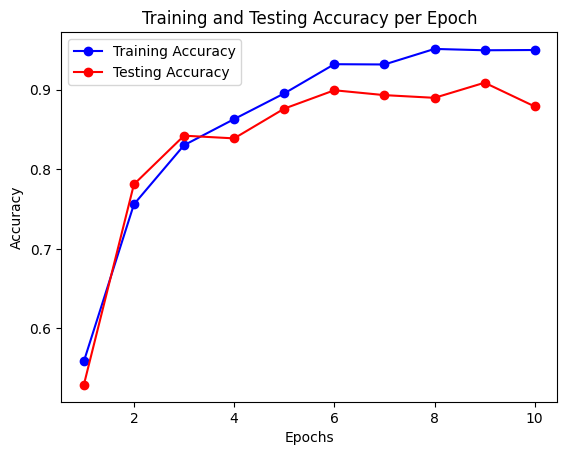

In [67]:
plot_accuracy_per_epoch(history)

# CNN+LSTM Improved

## Creating the Model

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, LSTM, Dropout

# Model Definition
cnn_model = Sequential([
    # Convolutional layer
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_time_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    # LSTM layer
    LSTM(64),
    # Fully connected layer
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

# Model compilation
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 126, 64)           1792      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 63, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_12 (Conv1D)          (None, 61, 128)           24704     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 30, 128)          0         
 g1D)                                                            
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_20 (Dense)            (None, 64)              

## Testing the Model

In [69]:
# Model Training
cnn_history = cnn_model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Predictions with test data
cnn_predictions = cnn_model.predict(test_data)

# Class with highest probability
cnn_predicted_classes = np.argmax(cnn_predictions, axis=1)
cnn_predicted_classes += 1

Epoch 1/10
184/184 [==============================] - 22s 96ms/step - loss: 0.7843 - accuracy: 0.6705 - val_loss: 0.4930 - val_accuracy: 0.8749
Epoch 2/10
184/184 [==============================] - 11s 62ms/step - loss: 0.3314 - accuracy: 0.8898 - val_loss: 0.4415 - val_accuracy: 0.9001
Epoch 3/10
184/184 [==============================] - 13s 73ms/step - loss: 0.1906 - accuracy: 0.9371 - val_loss: 0.4720 - val_accuracy: 0.9069
Epoch 4/10
184/184 [==============================] - 20s 110ms/step - loss: 0.1641 - accuracy: 0.9398 - val_loss: 0.4138 - val_accuracy: 0.9089
Epoch 5/10
184/184 [==============================] - 10s 52ms/step - loss: 0.1337 - accuracy: 0.9493 - val_loss: 0.4946 - val_accuracy: 0.9007
Epoch 6/10
184/184 [==============================] - 18s 98ms/step - loss: 0.1323 - accuracy: 0.9529 - val_loss: 0.4798 - val_accuracy: 0.9096
Epoch 7/10
184/184 [==============================] - 10s 55ms/step - loss: 0.1145 - accuracy: 0.9558 - val_loss: 0.5067 - val_accuracy

In [70]:
print_metrics(cnn_predicted_classes, original_classes)

Accuracy: 0.91
Confusion Matrix:
[[446  21  29   0   0   0]
 [  3 440  28   0   0   0]
 [  3   2 415   0   0   0]
 [  0   9   0 411  71   0]
 [  0   1   0  73 458   0]
 [  0  25   0   0   0 512]]
Precision per class: 0.99, 0.88, 0.88, 0.85, 0.87, 1.00
Recall per class: 0.90, 0.93, 0.99, 0.84, 0.86, 0.95
F1 Score per class: 0.94, 0.91, 0.93, 0.84, 0.86, 0.98
Macro Precision: 0.91
Macro Recall: 0.91
Macro F1 Score: 0.91


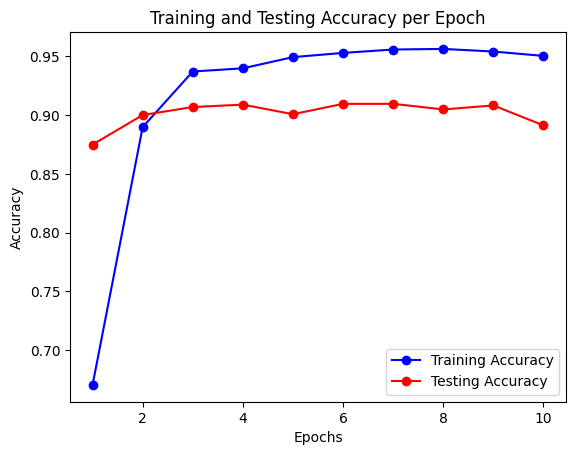

In [71]:
plot_accuracy_per_epoch(cnn_history)

# GRU

## Creating Model

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Model Definition
gru_model = Sequential([
    # GRU layer
    GRU(128, input_shape=(n_time_steps, n_features), return_sequences=True),
    Dropout(0.5),
    GRU(64, return_sequences=False),
    Dropout(0.5),
    # Fully connected layer
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')
])

# Model compilation
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
gru_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 128, 128)          53376     
                                                                 
 dropout_8 (Dropout)         (None, 128, 128)          0         
                                                                 
 gru_5 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 6)                 390       
                                                                 
Total params: 95,174
Trainable params: 95,174
Non-tra

## Testing Model

In [73]:
# Model training
gru_history = gru_model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Predictions with test data
gru_predictions = gru_model.predict(test_data)

# Class with highest probability
gru_predicted_classes = np.argmax(gru_predictions, axis=1)
gru_predicted_classes += 1

Epoch 1/10
184/184 [==============================] - 73s 373ms/step - loss: 1.1597 - accuracy: 0.4887 - val_loss: 1.0492 - val_accuracy: 0.5330
Epoch 2/10
184/184 [==============================] - 60s 325ms/step - loss: 0.6728 - accuracy: 0.7086 - val_loss: 0.4720 - val_accuracy: 0.8368
Epoch 3/10
184/184 [==============================] - 54s 296ms/step - loss: 0.3121 - accuracy: 0.8859 - val_loss: 0.2391 - val_accuracy: 0.9266
Epoch 4/10
184/184 [==============================] - 55s 299ms/step - loss: 0.2207 - accuracy: 0.9191 - val_loss: 0.3357 - val_accuracy: 0.8980
Epoch 5/10
184/184 [==============================] - 54s 292ms/step - loss: 0.1689 - accuracy: 0.9371 - val_loss: 0.3982 - val_accuracy: 0.8933
Epoch 6/10
184/184 [==============================] - 53s 290ms/step - loss: 0.1515 - accuracy: 0.9444 - val_loss: 0.4141 - val_accuracy: 0.9089
Epoch 7/10
184/184 [==============================] - 52s 282ms/step - loss: 0.1204 - accuracy: 0.9515 - val_loss: 0.5586 - val_ac

In [74]:
print_metrics(gru_predicted_classes, original_classes)

Accuracy: 0.90
Confusion Matrix:
[[456  29  10   0   1   0]
 [ 39 428   3   0   1   0]
 [  0   1 419   0   0   0]
 [ 21   4   0 419  47   0]
 [  7   0   0 112 413   0]
 [  0  17   0   0   0 520]]
Precision per class: 0.87, 0.89, 0.97, 0.79, 0.89, 1.00
Recall per class: 0.92, 0.91, 1.00, 0.85, 0.78, 0.97
F1 Score per class: 0.89, 0.90, 0.98, 0.82, 0.83, 0.98
Macro Precision: 0.90
Macro Recall: 0.90
Macro F1 Score: 0.90


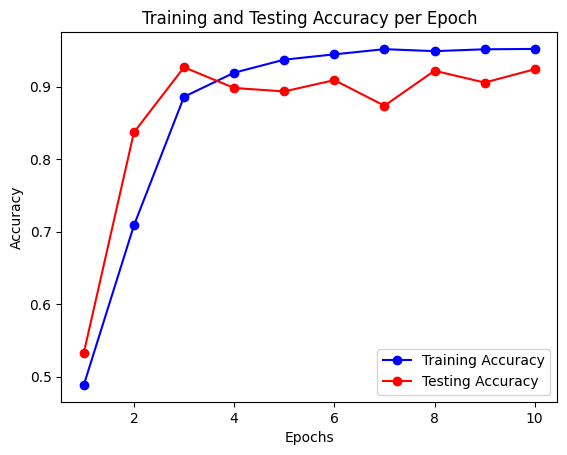

In [75]:
plot_accuracy_per_epoch(gru_history)

# CNN-GRU

## Creating Model

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout, Flatten

# Model Definition
cnn_gru_model = Sequential([
    # Convolutional layer
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_time_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    # GRU layer
    GRU(64, return_sequences=True),
    Dropout(0.5),
    GRU(64, return_sequences=False),
    Dropout(0.5),
    # Fully connected layer
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')
])

# Model compilation
cnn_gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
cnn_gru_model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 126, 64)           1792      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 63, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 61, 128)           24704     
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 30, 128)          0         
 g1D)                                                            
                                                                 
 gru_6 (GRU)                 (None, 30, 64)            37248     
                                                                 
 dropout_10 (Dropout)        (None, 30, 64)          

## Testing Model

In [77]:
# Model training
cnn_gru_history = cnn_gru_model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Predictions with test data
cnn_gru_predictions = cnn_gru_model.predict(test_data)

# Class with highest probability
cnn_gru_predicted_classes = np.argmax(cnn_gru_predictions, axis=1)
cnn_gru_predicted_classes += 1

Epoch 1/10
184/184 [==============================] - 27s 101ms/step - loss: 0.7580 - accuracy: 0.6713 - val_loss: 0.6124 - val_accuracy: 0.8246
Epoch 2/10
184/184 [==============================] - 16s 87ms/step - loss: 0.2598 - accuracy: 0.9036 - val_loss: 0.4877 - val_accuracy: 0.8987
Epoch 3/10
184/184 [==============================] - 16s 86ms/step - loss: 0.1399 - accuracy: 0.9485 - val_loss: 0.5328 - val_accuracy: 0.9062
Epoch 4/10
184/184 [==============================] - 17s 93ms/step - loss: 0.1162 - accuracy: 0.9527 - val_loss: 0.6586 - val_accuracy: 0.8654
Epoch 5/10
184/184 [==============================] - 18s 96ms/step - loss: 0.1121 - accuracy: 0.9549 - val_loss: 0.6307 - val_accuracy: 0.9055
Epoch 6/10
184/184 [==============================] - 17s 93ms/step - loss: 0.1039 - accuracy: 0.9578 - val_loss: 0.4698 - val_accuracy: 0.9082
Epoch 7/10
184/184 [==============================] - 18s 97ms/step - loss: 0.1102 - accuracy: 0.9529 - val_loss: 0.4133 - val_accuracy

In [78]:
print_metrics(cnn_gru_predicted_classes, original_classes)

Accuracy: 0.90
Confusion Matrix:
[[473   1  22   0   0   0]
 [  4 450  17   0   0   0]
 [  5   3 412   0   0   0]
 [  0   7   0 420  64   0]
 [  0   0   0 139 393   0]
 [  0  29   0   0   0 508]]
Precision per class: 0.98, 0.92, 0.91, 0.75, 0.86, 1.00
Recall per class: 0.95, 0.96, 0.98, 0.86, 0.74, 0.95
F1 Score per class: 0.97, 0.94, 0.95, 0.80, 0.79, 0.97
Macro Precision: 0.90
Macro Recall: 0.91
Macro F1 Score: 0.90


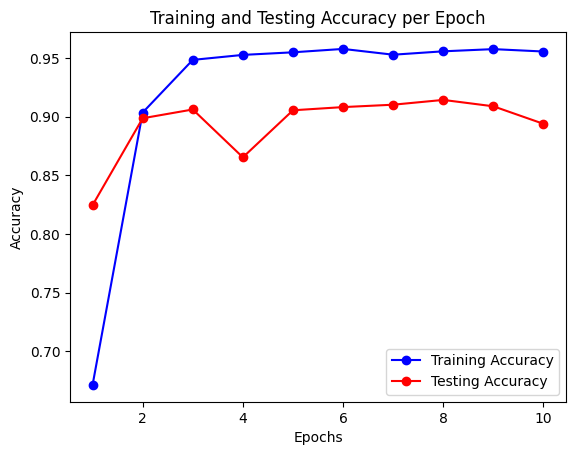

In [79]:
plot_accuracy_per_epoch(cnn_gru_history)